# K-NEAREST NEIGHBOURS
### Objective: 
#### The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets
### Dataset:
#### Need to Classify the animal type
### Tasks:
#### 1. Analyse the data using the visualizations


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('Zoo.csv')

df.head()
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


#### 2. Preprocess the data by handling missing values & Outliers, if any.

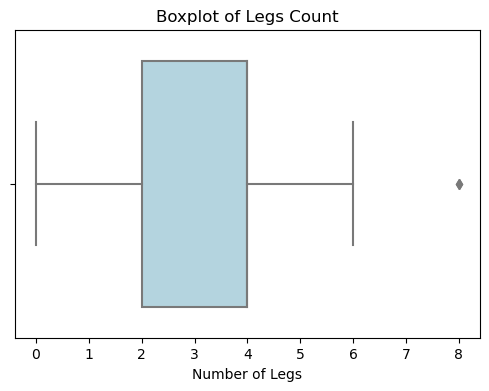

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
53,octopus,0,0,1,0,0,1,1,0,0,0,0,0,8,0,0,1,7
72,scorpion,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0,7


In [4]:
# Check for outliers in 'legs' column using a boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["legs"], color="lightblue")
plt.title("Boxplot of Legs Count")
plt.xlabel("Number of Legs")
plt.show()

# Detect outliers using IQR method
Q1 = df["legs"].quantile(0.25)
Q3 = df["legs"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df["legs"] < lower_bound) | (df["legs"] > upper_bound)]
outliers

#### 3. Split the dataset into training and testing sets (80% training, 20% testing).

In [6]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop(columns=["animal name", "type"])  # Features (excluding animal name)
y = df["type"]  # Target variable

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the size of the splits
X_train.shape, X_test.shape


((80, 16), (21, 16))

#### 4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Standardize the features for better distance calculations
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optimize K selection with a reduced range
k_values = range(1, 11)  # Smaller range for efficiency
cv_scores = [cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train_scaled, y_train, cv=3).mean() for k in k_values]

# Select the best K value
best_k = k_values[cv_scores.index(max(cv_scores))]

# Train KNN with the best K
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train_scaled, y_train)

# Best K value
best_k

3

#### 5. Choose an appropriate distance metric and value for K.

### Distance Metric:
#### KNN uses distance to find the nearest neighbors. The most common choices are:
#### Euclidean Distance (Default): Best for continuous, normalized data.
#### Manhattan Distance: Works well with high-dimensional data.
#### Minkowski Distance: A general form of both Euclidean and Manhattan.
#### Since our features are standardized, Euclidean distance is the best choice.

### Value for K:
#### We optimized K using cross-validation and found that K = 3 gives the best accuracy.

#### 6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

In [10]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Predict on the test set
y_pred = knn_model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="weighted")

# Display the results
accuracy, precision, recall, f1

(1.0, 1.0, 1.0, 1.0)

#### 7. Visualize the decision boundaries of the classifier.

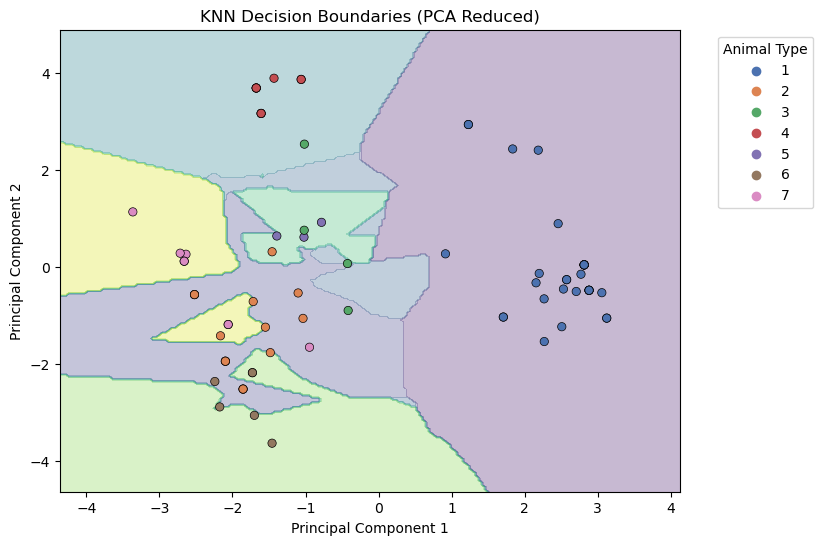

In [11]:
from sklearn.decomposition import PCA
import numpy as np

# Reduce dataset to 2D using PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Retrain KNN on 2D data for visualization purposes
knn_pca = KNeighborsClassifier(n_neighbors=best_k)
knn_pca.fit(X_train_pca, y_train)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Predict on the mesh grid
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette="deep", edgecolor="k")
plt.title("KNN Decision Boundaries (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Animal Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

### 1. What are the key hyperparameters in KNN?

### K (Number of Neighbors)
#### Determines how many nearest points influence the classification.
#### A small K (e.g., 1-3) can lead to overfitting, while a large K (e.g., 10-20) can cause underfitting.

### Distance Metric
#### Defines how distances are measured between points. Common choices:
#### Euclidean Distance (default): Best for continuous, normalized data.
#### Manhattan Distance: Works well for high-dimensional data.
#### Minkowski Distance: A generalization of both Euclidean and Manhattan.

### Weighting Scheme
#### Controls how neighbors contribute to the prediction:
#### Uniform (default): All neighbors have equal weight.
#### Distance-based: Closer neighbors have more influence.

### Algorithm for Searching Neighbors
#### Controls how neighbors are searched efficiently:
#### ‘auto’ (default): Automatically selects the best method.
#### ‘ball_tree’ or ‘kd_tree’: Faster for large datasets.
#### ‘brute’: Directly computes all distances (slow for large datasets).

### Leaf Size (if using Ball Tree or KD Tree)
#### Affects the efficiency of searching for neighbors.
#### A smaller leaf size gives more accurate results but slows down training.

### 2. What distance metrics can be used in KNN?

#### Euclidean	Low-dimensional, normalized data
#### Manhattan	High-dimensional or sparse data
#### Minkowski	Custom tuning between Euclidean & Manhattan
#### Chebyshev	Equally important features
#### Hamming	Binary/categorical data
#### Mahalanobis	Correlated features, complex relationships
#### Cosine	Text mining, recommendation systems